<h1>Topic analysis practice</h1>
<li>With lots of web scraping!</li>

<h4>In this assignment we’re going to practice topic analysis. Here’s
what you need to do:</h4>
<ol>
<li>From Wikipedia’s List of musicians page (https://en.wikipedia.org/wiki/Lists_of_musicians), pick three lists of
musicians (e.g., List of big band musicians). You can pick any three you like (or the ones I've used below) but make sure that the list has the words “musicians” in it and that the list has at least 30 musicians listed
<li>Scrape the urls of all the musicians on those three lists and place them in a list
<li>Scrape the content of each musician's page and place these contents in a list (of documents)
<li>Build an LDA model using this data (try 5 topics initially but you're welcome to play around with this). 
<li>Identify the topics in the data set. Do this by building a word cloud and by using PyLDAvis (note that you may combine topics generated by the LDA. I.e., if topic 1 and topic 3 look similar to you, just combine them into a single topic)
<li>Explain your rationale for each topic (briefly, please!)
<li>Now grab another list of musicians from wikipedia and create a new list of documents using the detail from each musicians page. This is your "musician" data set
<li>For each musician in the new list, find the musician in the reference data set that is the closest in similarity. 
<li>Print a table that contains each musician from the musician data set and the most similar musician from the reference data set
</ol>
<h4>Quite a bit of the code is written for you below!</h4>

<p><span style="color:blue">get_musicians</span>: A function that, given a "list of musicians" url, returns a list containing the names of the musicians and the urls for their wikipedia pages
<p>non_musician_finder tries its best to remove links that are not musician links from the page (not perfect, but good enough!)</p>
<p>Note that Wikipedia does not have a standard for its page design so this code may not work with every list. If it crashes, or if you get an empty list or empty set of documents, pick another list</p>


In [1]:
def get_musicians(url):
    from bs4 import BeautifulSoup
    import requests
    page_soup = BeautifulSoup(requests.get(url).content,'lxml')
    li_tags = page_soup.find_all('li')
    all_musicians = list()
    for tag in li_tags:
        if tag.get('id'):
            continue

        try:
            tag.find('sup',class_="reference")
            link = tag.find('a').get('href')
            name = tag.find('a').get_text()
            if "/wiki/" in link and non_musician_finder(link):
                all_musicians.append((name,"https://en.wikipedia.org" + link))
        except:
            pass
    return all_musicians

def non_musician_finder(link):
    non_musician_words = ['Category','Template','Portal','List','File','Template','Special','Main','Help','User']
    for word in non_musician_words:
        if word in link:
            return False
    return True

<h3>Test the get_musicians function</h3>
<li>Use this to test and see if your selected list contains musicians</li>

In [2]:
#test out your solution
url = "https://en.wikipedia.org/wiki/List_of_alternative_rock_artists"

musicians = get_musicians(url)
len(musicians) #I got 1366 musicians

1366

<h3>get_musician_text(url): returns the page text of the wikipedia page associated with a musician</h3>
<p></p>
<li>Since we're not sure if this will always work, we use a try ... except to catch exceptions
<li>If it doesn't work, the function returns None


In [3]:
def get_musician_text(url):
    from bs4 import BeautifulSoup
    import requests
    all_text = ''
    try:
        page_soup = BeautifulSoup(requests.get(url).content,'lxml')
        for p_tag in page_soup.find_all('p'):
            all_text += p_tag.get_text()
    except:
        return None
    return all_text


In [4]:
#Test it out
url = "https://en.wikipedia.org/wiki/Jim_Morrison"
get_musician_text(url)

'\nJames Douglas Morrison (December 8, 1943 – July 3, 1971) was an American singer-songwriter and poet who was the lead vocalist of the rock band the Doors. Due to his energetic persona, poetic lyrics, distinctive voice, unpredictable and erratic performances, along with the dramatic circumstances surrounding his life and early death, Morrison is regarded by music critics and fans as one of the most influential frontmen in rock history. Since his death, his fame has endured as one of popular culture\'s top rebellious and oft-displayed icons, representing the generation gap and youth counterculture.[4]\nTogether with pianist Ray Manzarek, Morrison founded the Doors in 1965 in Venice, California. The group spent two years in obscurity until shooting to prominence with their number-one hit single in the United States, "Light My Fire", taken from their self-titled debut album. Morrison recorded a total of six studio albums with the Doors, all of which sold well and many of which received c

<h2>STEP 1</h2>
Write the function <span style="color:green">get_all_musicians</span>: A function that, given a list of genres, returns a list containing the names of the musicians and the urls for their wikipedia pages associated with that list of genres
<p>The function should return a list of (name,url) pairs for all the musicians in the list of genres
<p>You need to:
<ol>
<li>iterate through the list of genres
<li>initialize a list "all_musicians"
<li>construct a url for the list of musicians (I've done these first three steps for you)
<li>call get_musicians for that url
<li>extend all_musicians by what get_musicians returns

In [5]:
##Scaffolded function (fill in the rest!)
def get_all_musicians(genre_list):
    all_musicians = list()
    for genre in genre_list:
        url = 'https://en.wikipedia.org/wiki/List_of_' + genre
    
        musicians = get_musicians(url)

        all_musicians.extend(musicians)
    
    return all_musicians

In [6]:
#Example of how to use get_all_musicians
genre_list = ['rock and roll artists','alternative rock artists','folk rock artists']
all_musicians = get_all_musicians(genre_list)
len(all_musicians) #The total count of musicians. My count was 1880

1880

<h2>STEP 2</h2>
Write the function <span style="color:blue">get_all_musician_docs</span>: A function that, given the list of (musician,url) pairs, returns two lists, a list of musicians and a parallel (same size) list of documents. </span>

<p>You need to:

<ol>
<li>initialize the two lists

<li>iterate through the all_musicians list
<li>extract the name and the url of the musician
<li>get the text using the get_musician_text() function
<li>if the function returns None, ignore it and move to the next musician
<li>otherwise, append the name ot the musician_names list and the text to the musician_texts list
<li>return musician_names and musician_texts
    
<b>Note: This is scraping a lot of data (approx 2000 wikipedia pages in my example!). Be patient!</b>


In [7]:
##Scaffolded function. Fill in the missing parts
def get_all_musician_docs(all_musicians):
    musician_names = list()
    musician_texts = list()
    for musician in all_musicians:
        name = musician[0]
        url = musician[1]
        text = get_musician_text(url)
        if text:
            musician_names.append(name)
            musician_texts.append(text)
    return musician_names,musician_texts

<h4>Using get_all_musicians_docs</h4>
In the example below, reference_names is the list of names of all musicians and reference_docs is the content of their Wikipedia pages. all_musicians is the list of (musician,url) that we created earlier.

raw_corpus combines reference_names and reference_docs into one list with the format:

<pre>
[(musician_1_name,musician_1_wiki_content), (musician_2_name,musician_2_wiki_content, .....]
</pre>

In [8]:
%%time
#This took 6 minutes 32 seconds on my machine
#Example of how to use get_all_musician_docs
reference_names,reference_docs = get_all_musician_docs(all_musicians)
raw_corpus = list(zip(reference_names,reference_docs))

CPU times: total: 29.3 s
Wall time: 5min 13s


<h2>STEP 3: Basic cleaning</h2>
<li>Ideally, we should use spacy for lemmatization and a stemmer to stem the words but that takes very long!</li>
<li>So we'll just stick with some basic cleaning steps</li>
<li>The function <span style="color:green">clean_corpus</span> returns a cleaned version of the corpus along with the vocabulary (i.e., the list of all acceptable words)</li>
<ul>
    <li>remove stopwords from the documents using the stopword list provided by nltk</li>
    <li>remove domain_stop_words (i.e., any domain specific stop words)</li>
    <li>remove words that contain non-alphanumeric characters (i.e., each remaining word should contain only a..z or A..Z</li>
    <li>remove words shorter than some minimum length</li>
    </ul>
<li>Useful functions:</li>
<ul>
    <li><span style="color:green">nltk.word_tokenize</span> tokenizes text into a list of words</li>
    <li><span style="color:green">some_string.isalpha()</span> returns True if some_string contains only the characters a..z or A..Z. False otherwise</li>
    <li><span style="color:green">nltk.corpus import stopwords</span> imports the variable stopwords (a Python set) that you can use to remove common words. Create your own list or set of domain_stop_words</li>
</ul>

In [13]:
%%time 
##This took 1 min 46 seconds on my machine
def clean_corpus(corpus,min_length=3):
    import nltk
    from nltk.corpus import stopwords
    domain_stop_words = {"music", "album", "song", "artist", "band", "released", "single", "record", "records", "release"}
    
    #Clean up the documents
    new_doc_list = list()
    for document in corpus:
        words = nltk.word_tokenize(document[1])
        words = [w for w in words if w not in stopwords.words('english') and w not in domain_stop_words and len(w) > min_length and w.isalpha()]
        new_doc_list.append((document[0], words)) #cleaned corpus should contain (musician_name,musician words) pairs
    vocab = {word: index for index, word in enumerate(set([item for sublist in new_doc_list for item in sublist[1]]))}
    return new_doc_list,vocab

clean_corp,vocab = clean_corpus(raw_corpus,5)

CPU times: total: 1min 6s
Wall time: 6min 47s


<h2>STEP 4: The LDA Model</h2>
<li>Prepare the corpus for the LDA model by stemming and lemmatizing</li>
<li>Create the word dictionary and the analysis word frequency vectors</li>
<li>set num topics to 5 and num passes to 10 (you can adjust/change these)</li>
<li>create the LDA model</li>

In [16]:
#Code for LDA model goes here
#5 topics 10 passes took 38 seconds on my machine
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

musician_texts = [doc[1] for doc in clean_corp]
musicians_dict = Dictionary(musician_texts)
musician_topic_corpus  = [musicians_dict.doc2bow(text) for text in musician_texts]
lda = LdaModel(musician_topic_corpus, num_topics=5, id2word=musicians_dict, passes=10)

<h2>STEP 5: Word Clouds</h2>
<li>Draw word clouds for the topics</li>

In [17]:
def draw_word_clouds(lda,num_topics,max_topic_words=30):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    from random import shuffle
    import math

    COL_NUM = 2
    ROW_NUM = math.ceil(num_topics/2)
    
    fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

    for i in range(0,num_topics):
        word_list=[]
        prob_total = 0
        for word,prob in lda.show_topic(i,topn=max_topic_words):
            prob_total +=prob
        for word,prob in lda.show_topic(i,topn=max_topic_words):
            if word in STOPWORDS:
                continue
            freq = int(prob/prob_total*1000)
            alist=[word]
            word_list.extend(alist*freq)
            shuffle(word_list)
            text = ' '.join(word_list)
            wordcloud = WordCloud(stopwords=STOPWORDS,max_words=20).generate(text)
            ax = axes[i//2, i%2] 
            ax.set_title("topic " + str(i))
            ax.imshow(wordcloud)
            ax.axis('off')
    plt.show()    

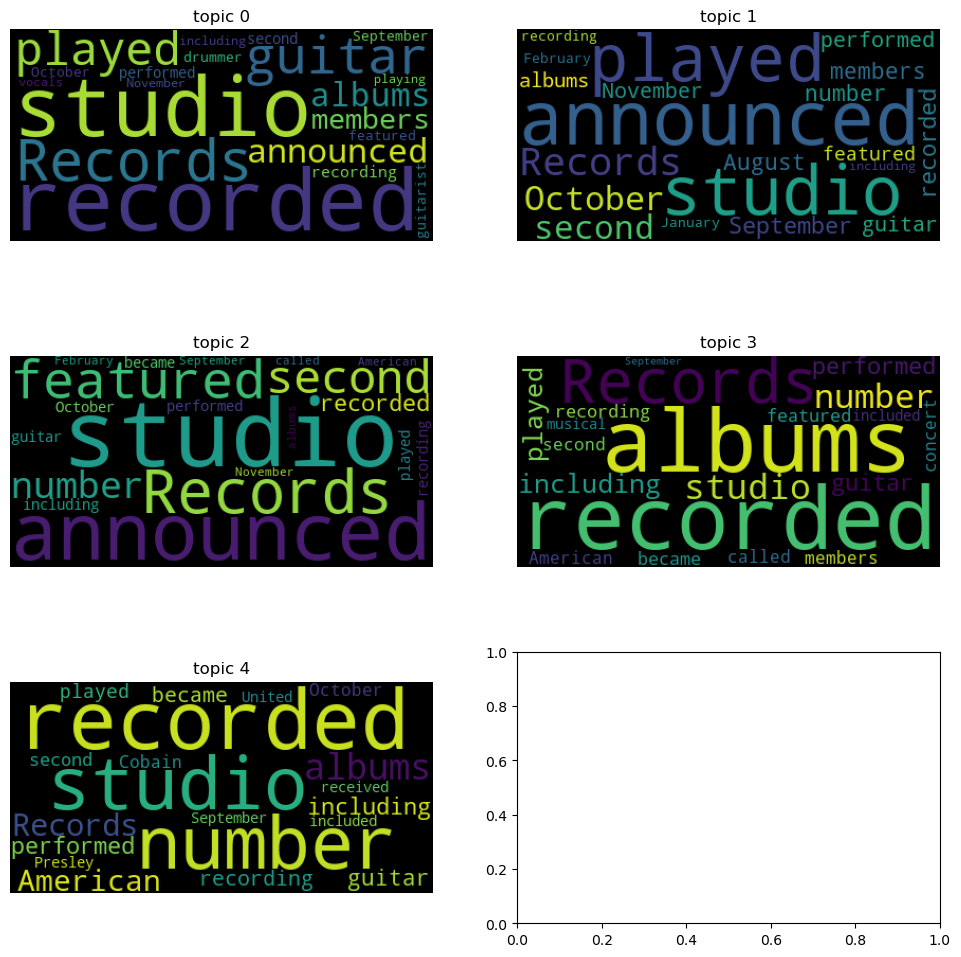

In [18]:
draw_word_clouds(lda,5,30)

<h2> STEP 6: Use the pyLDAvis visualizer</h2>

In [19]:
import pyLDAvis.gensim_models
lda_display = pyLDAvis.gensim_models.prepare(lda, musician_topic_corpus, musicians_dict, sort_topics=False)
pyLDAvis.display(lda_display)

<h2>STEP 7: Describe each topic in a sentence or two</h2>

In [20]:
#What do you think the topics represent?
topic1 = "Topic 1 focuses on the recording process and the production of music in studios. Most of the words in this topic are related to the technical and creative aspects involved in making music."
topic2 = "Topic 2 focuses on the timeline of the work. Most of the terms are related to speicifc months or the release of the ablum."
topic3 = "Topic 3 focuses on the promotion and commercial aspect of the music."
topic4 = "Topic 4 focuses on the output of the music production."
topic5 = "Topic 5 focuses on influential figures or events in the music industry."

<span style="color:green;font-size:40px">Find similar musicians</span>
<p></p>
<li>Choose one or two new music genres (or just use the ones I've chosen</li>
<li>Get the names and documents for the musicians in these new genres</li>
<li>For each musician in this new set, find the most similar musician from the reference set (the set we used to train the lda)</li>
<li>You'll need to iterate through the new set of documents, find the most similar musician document from the lda for each document, and return the name of the new musician and the most similar musician from the original list</li>
<li>Return all this in a giant list</li>
<li>And then print this list in a formatted manner</li>
<li>Example of output :</li>
<pre>
Test Musician                           	Similar Musician                        
AC/DC                                   	Brandon Flowers                         
Aerosmith                               	Marshall Drew                           
Bernard Allison                         	Cliff Richard                           
The Allman Brothers Band                	Judy Collins                            
Devon Allman                            	Hüsker Dü                               
Duane Allman                            	The Apples in Stereo                    
Gregg Allman                            	Neil Young                              
American Blues                          	Juliette and the Licks                  
Jake Andrews                            	Nada Surf                               
The Animals                             	Warren Zevon                            
The Answer                              	Derek Webb                              
Arc Angels                              	Marshall Drew                           
The Ardells                             	Bermuda Triangle Band                   
Gwyn Ashton                             	Seaweed                                 
Atomic Rooster                          	Luscious Jackson                        
The Aynsley Dunbar Retaliation          	Dishwalla                               
Bachman–Turner Overdrive                	Suede                                   
Back Door Slam                          	Coast                                   
Bad Company                             	Travis                                  
Ginger Baker                            	B.B. King                               
Long John Baldry                        	B.B. King                               
Band of Skulls                          	Zox                                     
The Barons                              	Soccer Mommy                            
Lou Ann Barton                          	Latin alternative                       
Jeff Beck                               	B.B. King                               


</pre>
<small>I haven't heard of most of these musicians but some do make sense. Examples: Gregg Allman/Neil Young; Ginger Baker/B.B. King; Jeff Beck/B.B. King</small>

<h2>STEP 8: Get a corpus (name,doc) pairs for a new list</h2>

In [21]:
%%time
#This took 58.5 seconds on my machine
new_musician_genre_list = ['dance-pop artists']
new_all_musicians = get_all_musicians(new_musician_genre_list)
new_musician_names,new_musician_docs = get_all_musician_docs(new_all_musicians)

CPU times: total: 8.09 s
Wall time: 1min 1s


<h2>STEP 9: Similarities</h2>
<li>Use gensim similarities to construct a similarity matrix on the original corpus</li>
<li>Iterate through the new set of musician documents</li>
<ul>
    <li>for each document find its topic distribution</li>
    <li>find the most similar document using this topic distribution and the similarity matrix computed above</li>
    <li>get the name of the musician in the original corpus that is the most similar</li>
    <li>get the name of the new musician</li>
    <li>append this (new_musician, similar_old_musician) pair to a list</li>
</ul>
<li>print the list in the desired format</li>

In [22]:
import numpy as np
from gensim.similarities import MatrixSimilarity
index = MatrixSimilarity(lda[musician_topic_corpus])

In [23]:
similar_musician = list()

for new_musician_doc in new_musician_docs:
    new_musician_bow = musicians_dict.doc2bow(new_musician_doc.lower().split())
    new_musician_lda = lda[new_musician_bow]
    sim = index[new_musician_lda]
    original_musician = reference_names[np.argmax(sim)]
    new_musician = new_musician_names[new_musician_docs.index(new_musician_doc)]
    similar_musician.append((original_musician,new_musician))

In [28]:
print(f"Tested Musicians \t\t\t\t\t\t Similar Musicians")
for tested, similar in similar_musician:
    print(f"{tested:50} \t\t {similar:50}")

Tested Musicians 						 Similar Musicians
Flatfoot 56                                        		 1 Girl Nation                                     
Seether                                            		 13 Stories                                        
New Order                                          		 2 Unlimited                                       
Lo-Pro                                             		 3OH!3                                             
Punk rock                                          		 Aaliyah                                           
Folk Implosion                                     		 Paula Abdul                                       
The Clouds                                         		 Ace of Base                                       
Nu gaze                                            		 Christina Aguilera                                
Fitz and the Tantrums                              		 Alcazar                                           
King Charles 